In [14]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

In [16]:
%matplotlib inline

In [9]:
# Dictionary to store all evaluation metrics
metrics_results = []

# Loop through industries and stocks
for industry, stocks in industries.items():
    for stock in stocks:
        print(f"\n Processing: {industry}/{stock}")

        model_file = os.path.join("models", industry, f"{stock}_model.keras")
        scaler_file = os.path.join("models", industry, f"{stock}_scaler.pkl")
        data_file = os.path.join("data", industry, f"{stock}.csv")
        
        if not (os.path.exists(model_file) and os.path.exists(scaler_file) and os.path.exists(data_file)):
            print(f" Model, scaler, or data not found for {stock}. Skipping...")
            continue
        
=        model = load_model(model_file)
        with open(scaler_file, 'rb') as f:
            scaler = pickle.load(f)
        
        # Load the dataset
        df = pd.read_csv(data_file)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df = df[['Close']]
        
        scaled_data = scaler.transform(df)
        
        # Split into training and testing sets
        train_size = int(len(scaled_data) * 0.8)
        train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
        
        # Create sequences for testing
        x_test, y_test = create_sequences(test_data)
        
        if len(x_test) == 0 or len(y_test) == 0:
            print(f"⚠️ Not enough data for testing: {stock}. Skipping...")
            continue
        
        # Evaluate Model on Test Set
        print(f"🧪 Evaluating model for {stock}...")
        test_predictions = model.predict(x_test)
        test_predictions = scaler.inverse_transform(test_predictions)
        y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

        mse = mean_squared_error(y_test_rescaled, test_predictions)
        mae = mean_absolute_error(y_test_rescaled, test_predictions)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test_rescaled - test_predictions) / y_test_rescaled)) * 100
        
        print(f"📈 Evaluation Metrics for {stock}:")
        print(f"   - Mean Absolute Error (MAE): {mae}")
        print(f"   - Root Mean Squared Error (RMSE): {rmse}")
        print(f"   - Mean Absolute Percentage Error (MAPE): {mape}%")

        # Store all metrics for grid table visualization
        metrics_results.append([industry, stock, mae, rmse, mape])

print("\n🎉 Prediction and evaluation complete for all stocks!")


 Processing: agro/CBG.BK
🧪 Evaluating model for CBG.BK...
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
📈 Evaluation Metrics for CBG.BK:
   - Mean Absolute Error (MAE): 2.4385335205724
   - Root Mean Squared Error (RMSE): 3.015258319813402
   - Mean Absolute Percentage Error (MAPE): 3.438638328247888%

 Processing: agro/OSP.BK
🧪 Evaluating model for OSP.BK...
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
📈 Evaluation Metrics for OSP.BK:
   - Mean Absolute Error (MAE): 0.7786655022353722
   - Root Mean Squared Error (RMSE): 1.1210023615422129
   - Mean Absolute Percentage Error (MAPE): 3.9598753147190524%

 Processing: agro/OKJ.BK
 Model, scaler, or data not found for OKJ.BK. Skipping...

 Processing: agro/CPF.BK
🧪 Evaluating model for CPF.BK...
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
📈 Evaluation Metrics for CPF.BK:
   - Mean Absolute Error (MAE): 0.4103028029991837
   - Root Mean Squared Error (RMSE): 0.5361084302139272
   - Mean Absolute Percentage Error (MAPE): 1.7946820444440386%

 Processing: agro

In [20]:
metrics_df = pd.DataFrame(metrics_results, columns=['Industry', 'Stock', 'MAE', 'RMSE', 'MAPE'])

# Set the index for better visualization
metrics_df.set_index(['Industry', 'Stock'], inplace=True)

# Custom Color Mapping:
# - Green for ≤ 5 (Good Performance)
# - Orange to Red for > 5 (Poor Performance)
def color_map(val):
    if val <= 5:
        return 'background-color: #90EE90'  # Light Green
    elif val <= 10:
        return 'background-color: #FFA500'  # Orange
    else:
        return 'background-color: #FF0000'  # Red

styled_df = metrics_df.style.applymap(color_map)
styled_df

/var/folders/vw/288jn05573d78l0mr6f151zc0000gn/T/ipykernel_50160/1074744524.py:17: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = metrics_df.style.applymap(color_map)


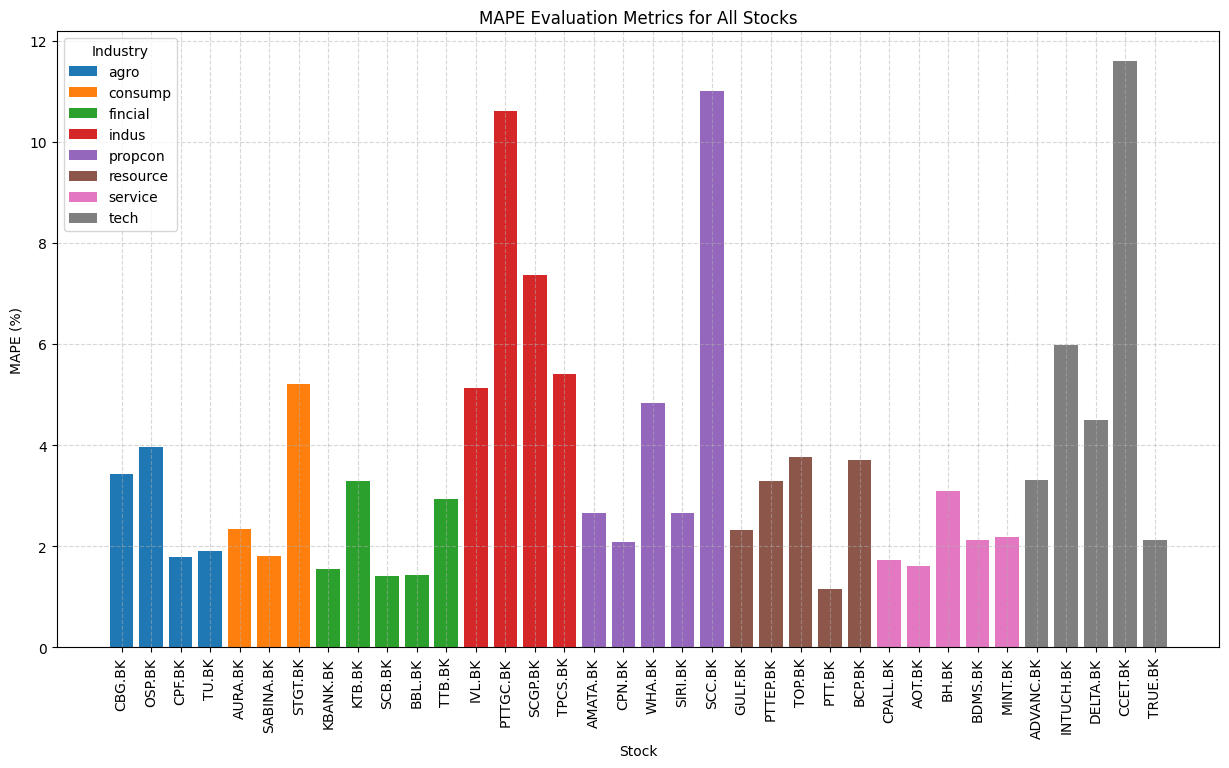

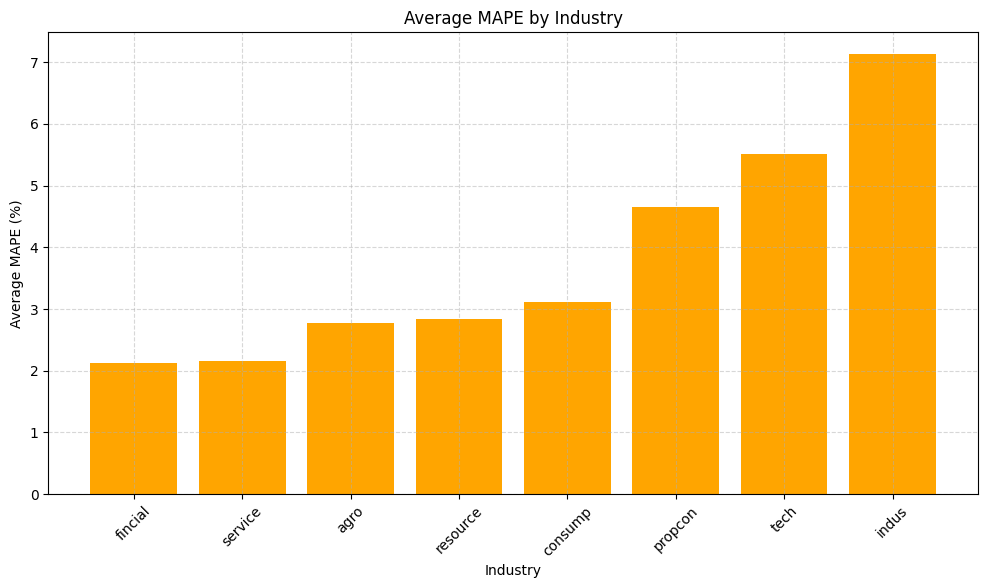

In [8]:
# 📊 MAPE Visualization
mape_df = pd.DataFrame(
    [(industry, stock, mape) for industry, stocks in mape_results.items() for stock, mape in stocks],
    columns=['Industry', 'Stock', 'MAPE']
)

# Plot MAPE for each stock
plt.figure(figsize=(15, 8))
for industry in mape_df['Industry'].unique():
    subset = mape_df[mape_df['Industry'] == industry]
    plt.bar(subset['Stock'], subset['MAPE'], label=industry)

plt.title('MAPE Evaluation Metrics for All Stocks')
plt.xlabel('Stock')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=90)
plt.legend(title='Industry')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Industry-wise MAPE Comparison
industry_avg_mape = industry_avg_mape.sort_values(by='MAPE')

# Plot Industry-wise Average MAPE
plt.figure(figsize=(12, 6))
plt.bar(industry_avg_mape['Industry'], industry_avg_mape['MAPE'], color='orange')
plt.title('Average MAPE by Industry')
plt.xlabel('Industry')
plt.ylabel('Average MAPE (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Run individual -------------------------------------------------------

In [22]:
# Get predictions and actual

# "models", "INDUSTRY", "{stock}_model.keras"
model_file = os.path.join("models", "fincial", "TTB.BK_model.keras")
scaler_file = os.path.join("models", "fincial", "TTB.BK_scaler.pkl")
data_file = os.path.join("data", "fincial", "TTB.BK.csv")

        
# Load the model and scaler
model = load_model(model_file)
with open(scaler_file, 'rb') as f:
    scaler = pickle.load(f)


# Load the dataset
df = pd.read_csv(data_file)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
        
scaled_data = scaler.transform(df)
        
# Split into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
        
# Create sequences for testing
x_test, y_test = create_sequences(test_data)
        
if len(x_test) == 0 or len(y_test) == 0:
    print(f"⚠️ Not enough data for testing: {stock}. Skipping...")
        
# Evaluate Model on Test Set
print(f"🧪 Evaluating model for {stock}...")
test_predictions = model.predict(x_test)
test_predictions = scaler.inverse_transform(test_predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

🧪 Evaluating model for TRUE.BK...
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [27]:
# Take the last 60 days from the dataset for generating future predictions
last_60_days = scaled_data[-60:]

# Reshape last_60_days to fit the model input shape
x_future = last_60_days.reshape((1, last_60_days.shape[0], 1))

# Generate predictions
predictions = []
for _ in range(30):
    pred = model.predict(x_future) # Predict the next day
    predictions.append(pred[0,0]) # Append the prediction to the list

    # Update x_future by removing the first value and appending the prediction at the end
    x_future = np.append(x_future[:, 1:, :], np.array([[pred[0, 0]]]).reshape(1, 1, 1), axis=1)

# Inverse transform the predictions to get them back to the original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Convert predictions to a DataFrame
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
predictions_df = pd.DataFrame(predictions, index=future_dates, columns=['Predicted Close'])
print(predictions_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

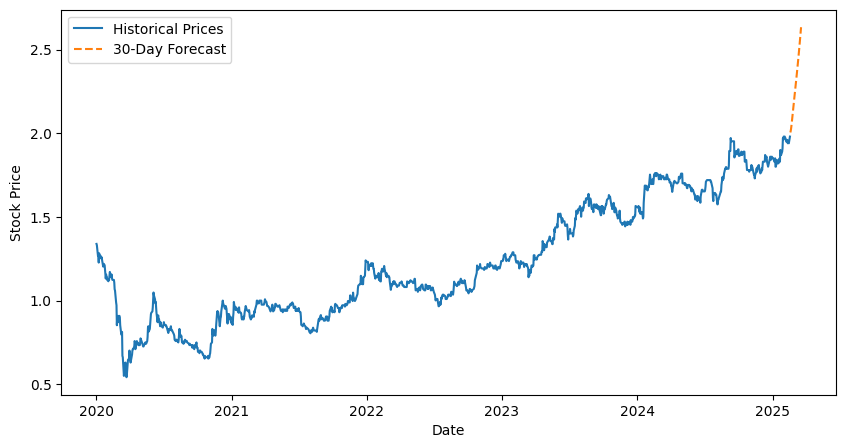

In [28]:
# Plot historical data and future predictions for comparison
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Historical Prices')
plt.plot(predictions_df, label='30-Day Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

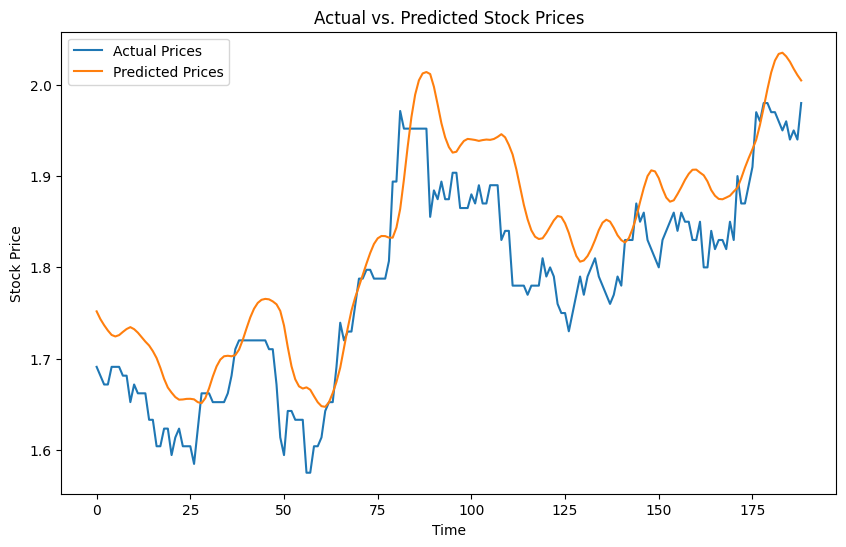

In [29]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Prices')
plt.plot(test_predictions, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()